# Data

Although there is currently limited support for doing anything besides plotting, data can be loaded using the `loadCSV` function:

In [1]:
sirCSV = loadCSV("sir.csv")

The loaded data is displayed as a table by default - if we write `sirCSV` on a line by itself it will render a table:

In [2]:
sirCSV

|time|I|R|S|
|---|---|---|---|
|0.0|3.0|0.0|997.0|
|5.0|17.827301995029735|1.668371141902185|980.504326863068|
|10.0|97.08519466856517|11.155444903388798|891.7593604280462|
|15.0|363.22005615422256|53.63077503917605|583.1491688066016|
|20.0|636.0382216138053|157.4293219018267|206.53245648436823|
|25.0|655.2388681472286|289.78479766348056|54.97633418929111|
|30.0|570.9758704928558|412.9874937769227|16.03663573022174|
|35.0|476.7185607167301|517.6506819364466|5.630757346823405|
|40.0|393.2132199199329|604.4223735913544|2.3644064887128486|
|45.0|323.01305161575914|675.8292214365681|1.1577269476727203|
|50.0|264.9200513160759|734.4356583424276|0.6442903414964432|
|55.0|217.11847387972838|782.4830388063548|0.3984873139166247|
|60.0|177.8779577926564|821.8532405832789|0.2688016240645766|
|65.0|145.70073484406444|854.1045650576555|0.19470009827999374|
|70.0|119.33032299421743|880.5201758200819|0.14950118570054138|
|75.0|97.72558283491858|902.1539995170904|0.12041764799083274|
|80.0|80.02854892667683|919.8705843314254|0.10086674189751195|
|85.0|65.5341093962191|934.3786456565022|8.72449472785935e-2|
|90.0|53.66360144437739|946.2589265354269|7.747202019553717e-2|
|95.0|43.94251773719813|955.9871919361558|7.029032664581711e-2|
|100.0|35.98194596795576|963.9531457874988|6.490824454510953e-2|
|105.0|29.463224176327937|970.4759662982166|6.080952545522722e-2|
|110.0|24.125302101237093|975.8170510491752|5.764684958744784e-2|
|115.0|19.75435345668962|980.1904664950374|5.51800482727434e-2|
|120.0|16.17524904269026|983.7715119691055|5.323898820398218e-2|

But can also be plotted using the `plot` function - the second argument is which part of the data series to use as a x-axis:

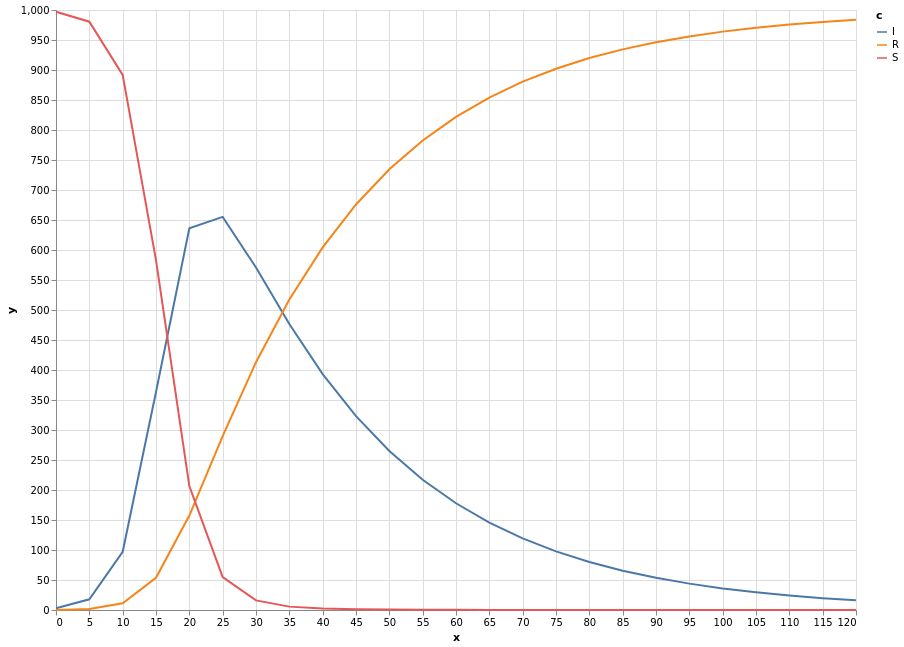

In [3]:
plot(sirCSV, "time")

# Models

Several formats of model can be loaded (although currently not all operations are supported on all types of model).

The `loadESL` function allows the user to load an Easel model.  Easel is a language designed to express the behavior of models in a general way so that it is easy to convert to/from Easel to other representations.

In [4]:
sirESL = loadESL("sir.esl")

`sirESL` on a line by itself will show the model source code:

In [5]:
sirESL

model SIR:
  let beta = 0.4
  let gamma = 0.04

  let s_initial = 997
  let i_initial = 3
  let r_initial = 0

  state S = s_initial
  state I = i_initial
  state R = r_initial

  let total_population = S + I + R

  assert total_population == s_initial + i_initial + r_initial # total population is constant

  event Infect:
    rate: 
      beta * S * I / total_population
    effect:
      S -= 1
      I += 1
      
  event Remove:
    rate: 
      gamma * I
    effect:
      I -= 1
      R += 1
      
      

There is some support for conversion between model types - for example we can convert `sirESL` into a latex `eqnarray`:

In [6]:
asEqnArray(sirESL)

\begin{eqnarray}
\beta  & = &  0.4\\
\gamma  & = &  0.04\\
\verb|i_initial|  & = &  3.0\\
\verb|r_initial|  & = &  0.0\\
\verb|s_initial|  & = &  997.0\\
\verb|total_population|  & = &  S + I + R\\
I(0)  & = &  3.0\\
R(0)  & = &  0.0\\
S(0)  & = &  997.0\\
\frac{d I}{dt} & = & (\frac{\beta   S   I}{\verb|total_population|}) + ((-(\gamma))   I)\\
\frac{d R}{dt} & = & \gamma   I\\
\frac{d S}{dt} & = & \frac{(-(\beta))   S   I}{\verb|total_population|}
\end{eqnarray}

There is also support for expressing models as reaction networks in a syntax inspired by Julia's [Catalyst](https://github.com/SciML/Catalyst.jl) library - `loadReactionNet` is the function used to load these:

In [7]:
sirRNet = loadReactionNet("sir.rnet")

And here is the model source:

In [8]:
sirRNet

let S = 997.0
let I = 3.0
let R = 0.0

let N = S + I + R

let beta = 0.4/N
let gamma = 0.04


beta,  S + I --> 2I
gamma, I     --> R




As another example of conversion, we can convert this model into ESL:

In [9]:
asESL(sirRNet)

model foo:
  state I = 3.0
  state R = 0.0
  state S = 997.0
  let N = ((S + I) + R)
  let beta = (0.4 / N)
  let gamma = 4.0e-2
  event a1:
    rate:
      (beta * (I * S))
    effect:
      I = ((I + 2.0) - 1.0)
      S = (S - 1.0)
  event b1:
    rate:
      (gamma * I)
    effect:
      I = (I - 1.0)
      R = (R + 1.0)

**NOTE:** Not all conversions are supported, and it may be possible that some formats can represent models that cannot be represented in other formats.

# Simulation

We can use the `simulateODE` function to run a simulation of model using a differential equation solver.

The syntax is `simulateODE(model, start_time, end_time, time_interval)`

The resulting data series is a representation of the average behavior of the system.

In [10]:
odeSimResults = simulateODE(sirESL, 0.0, 120.0, 1.0)

The results can be used in the same way the data we loaded with `loadCSV` could be - here as a table:

In [11]:
odeSimResults

|R|S|I|time|
|---|---|---|---|
|0|997|3|0|
|0.1443375362241937|995.5619928055532|4.293669658222546|1|
|0.3508453733521693|993.5082006176643|6.1409540089834636|2|
|0.6460543037739302|990.5796005561483|8.774345140077777|3|
|1.067559684729305|986.413041540938|12.519398774332606|4|
|1.6683711456904895|980.5043268261201|17.827302028189454|5|
|2.5227028750315643|972.1632482272854|25.31404889768309|6|
|3.733407979501335|960.4641816575346|35.802410362964196|7|
|5.44099001515001|944.202702010642|50.35630797420808|8|
|7.833499654176142|921.8806546803216|70.28584566550234|9|
|11.155444937975203|891.7593601220868|97.08519493993815|10|
|15.712005067249164|852.0376527153941|132.250342217357|11|
|21.862670193647467|801.210787437085|176.92654236926785|12|
|29.99723065235557|738.616220264616|231.3865490830286|13|
|40.489308213573835|665.0469813868016|294.4637103996248|14|
|53.630775108795476|583.1491686778321|363.22005621337263|15|
|69.56319218222148|497.26289423348646|433.1739135842923|16|
|88.23188213369133|412.5807537246835|499.1873641416254|17|
|109.38401254851472|333.9230757552112|556.6929116962743|18|
|132.61286324040694|264.7066286802342|602.680508079359|19|
|157.4293216298059|206.53245472429953|636.0382236458947|20|
|183.33374999672563|159.39944431667905|657.2668056865954|21|
|209.8689746174935|122.24913237506853|667.8818930074381|22|
|236.6486572423967|93.52831300404995|669.8230297535534|23|
|263.36519476834013|71.6002686761433|665.0345365555166|24|
|289.7847976640284|54.976333680563286|655.2388686554084|25|
|315.73657736111807|42.410034525324846|641.8533881135572|26|
|341.10015850767695|32.90909900201978|625.9907424903033|27|
|365.7941930223468|25.70816996476682|608.4976370128865|28|
|389.76671602277344|20.228320107676065|590.0049638695506|29|
|412.98749383562557|16.036635590779944|570.9758705735946|30|
|435.4421572242731|12.811320507293907|551.7465222684332|31|
|457.12779737962046|10.313696740775692|532.5585058796041|32|
|478.0497022697345|8.366651485831174|513.5836462444347|33|
|498.2189562735378|6.838450715676586|494.94259301078597|34|
|517.6506820007623|5.63075729976907|476.718560699469|35|
|536.362755021687|4.669832547091165|458.9674124312223|36|
|554.3748650148988|3.900099686592097|441.72503529850957|37|
|571.7078301505626|3.279439297052603|425.01273055238534|38|
|588.3830966081244|2.775746713408187|408.8411566784678|39|
|604.4223736500982|2.3644064697311764|393.21321988017104|40|
|619.8473681914705|2.0264329515002055|378.12619885702964|41|
|634.6795926159281|1.747095747176345|363.5733116368959|42|
|648.9402266883519|1.5148985839334832|349.5448747277149|43|
|662.6500195481472|1.3208171085635572|336.02916334328955|44|
|675.8292214877314|1.157726938865558|323.01305157340335|45|
|688.4975379217581|1.019972211078033|310.4824898671642|46|
|700.6740999208089|0.90303836790702|298.4228617112843|47|
|712.3774471228814|0.8033026723942492|286.81925020472454|48|
|723.6255198934895|0.7178429714292857|275.65663713508144|49|
|734.4356583855149|0.6442903365749246|264.9200512779104|50|
|744.8246067284465|0.5807149254824469|254.59467834607116|51|
|754.8085210074962|0.5255371236559861|244.6659418688479|52|
|764.402980015628|0.47745802132891724|235.11956196304314|53|
|773.6229980044238|0.4354047521203924|225.9415972434559|54|
|782.4830388418103|0.3984873107205116|217.11847384746937|55|
|790.9970311248235|0.3659642798582003|208.63700459531856|56|
|799.1783839009624|0.33721550448878385|200.48440059454904|57|
|807.0400027328565|0.3117202082755996|192.64827705886825|58|
|814.5943059032534|0.28903939267789625|185.11665470406905|59|
|821.8532406053648|0.2688016209271477|177.87795777370837|60|
|828.8282990007626|0.2506914888649101|170.92100951037284|61|
|835.5305340558615|0.23444023751562548|164.23502570662322|62|
|841.970575090465|0.21981807985672397|157.80960682967861|63|
|848.1586429893553|0.20662790507168985|151.63472910557337|64|
|854.1045650415849|0.19470009401894015|145.70073486439645|65|
|859.8177893828271|0.18388823451843306|139.99832238265483|66|
|865.3073990245147|0.17406556796717776|134.51853540751856|67|
|870.5821254600534|0.1651220324843916|129.25275250746267|68|
|875.650361843514|0.15696179434062799|124.19267636214583|69|
|880.5201757402044|0.14950118043373237|119.33032307936234|70|
|885.1993214516236|0.14266694125756169|114.65801160711933|71|
|889.6952519196966|0.1363947871056005|110.16835329319827|72|
|894.0151302170243|0.13062815088602053|105.85424163209015|73|
|898.1658406312716|0.12531713945963394|101.70884222926922|74|
|902.1539993528527|0.12041764228521855|97.7255830048626|75|
|905.9859647758221|0.11589057170969652|93.89814465246872|76|
|909.6678474224082|0.11170121374160343|90.22045136385076|77|
|913.2055195019689|0.10781867180599079|86.68666182622569|78|
|916.6046241153549|0.10421538896374169|83.29116049568185|79|
|919.8705841157525|0.10086673652000591|80.02854914772794|80|
|923.0086106370768|0.09775065894975984|76.89363870397398|81|
|926.0237113009141|0.09484736671679872|73.88144133236968|82|
|928.920698112884|0.09213906992248115|70.98716281719406|83|
|931.7041950591175|0.08960974684575931|68.2061951940372|84|
|934.3786454133441|0.0872449423694696|65.53410964428696|85|
|936.9483187648478|0.08503159206423488|62.966649643088395|86|
|939.4173177773062|0.08295786834871935|60.499724354345624|87|
|941.7895846882565|0.08101304568615729|58.129402266057916|88|
|944.0689075586694|0.07918738223057789|55.85190505910058|89|
|946.2589262818253|0.0774720157170813|53.663601702458124|90|
|948.3631383604122|0.07585887171124613|51.56100276787707|91|
|950.3849044604806|0.0743405826033983|49.540754956916565|92|
|952.3274537506124|0.0729104159623741|47.599635833425744|93|
|954.1938890343828|0.07156221105742817|45.734548754560336|94|
|955.9871916839194|0.07029032252173992|43.94251799355939|95|
|957.7102263820977|0.06908957027124962|42.22068404763148|96|
|959.365745680645|0.06795519491220375|40.56629912444324|97|
|960.9563943811692|0.06688281797304628|38.97672280085816|98|
|962.4847137458798|0.06586840638385755|37.449417847736655|99|
|963.953145544521|0.06490824070167056|35.98194621477765|100|
|965.3640359438011|0.06399888664457366|34.571965169554645|101|
|966.7196392453733|0.0631371695531219|33.21722358507397|102|
|968.0221214781965|0.06232015144555877|31.915558370358323|103|
|969.2735638508918|0.06154511037481595|30.66489103873375|104|
|970.4759660694978|0.060809521831157884|29.463224408671433|105|
|971.6312495258275|0.06011104196547054|28.308639432207375|106|
|972.7412603614337|0.05944749243523738|27.199292146131427|107|
|973.8077724119987|0.058816846698775765|26.133410741302786|108|
|974.8324900367855|0.05821721760381291|25.109292745610936|109|
|975.8170508376066|0.05764684613437881|24.12530231625925|110|
|976.763028271602|0.05710409119564001|23.179867637202566|111|
|977.67193416195|0.05658742032999647|22.271478417720143|112|
|978.5452211104792|0.05609540126977438|21.3986834882512|113|
|979.3842848159961|0.05562669424239398|20.5600884897617|114|
|980.1904663019988|0.055180044953164586|19.754353653048348|115|
|980.9650540573026|0.054754278179024916|18.98019166451865|116|
|981.709286092972|0.0543482919137462|18.236365615114522|117|
|982.4243519188174|0.053961052011473006|17.52168702917142|118|
|983.1113944425939|0.053591587281096704|16.835013970125235|119|
|983.7715117949159|0.05323898498893148|16.175249220095353|120|

Or as a plot:

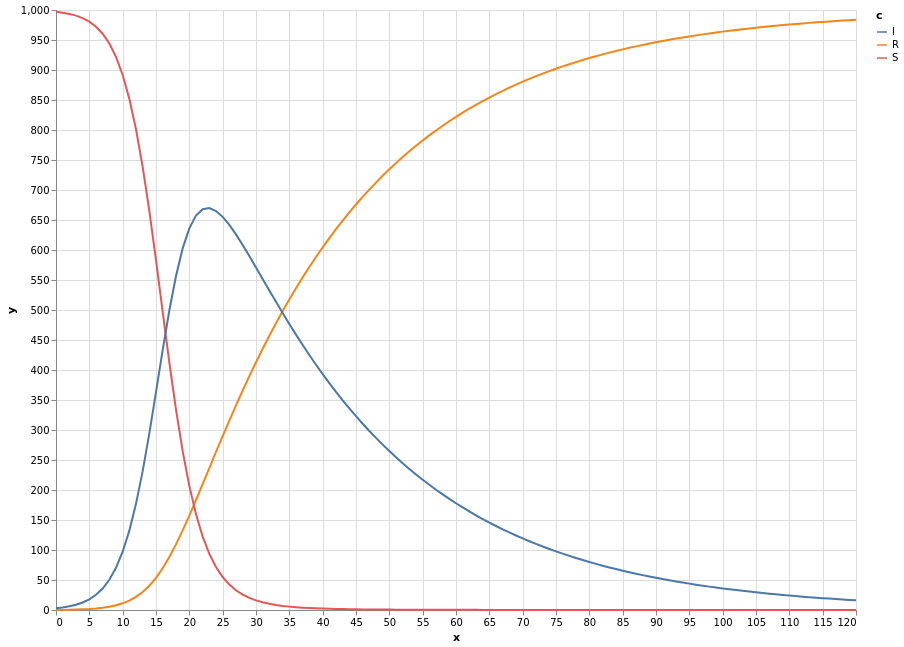

In [12]:
plot(odeSimResults, "time")

# Code Generation

It is also possible to generate C++ code implementing a custom discrete event simulator for an ESL model:

In [13]:
genSim = generateSimulator(sirESL)

`genSim` now contains a string of C++ code implementing a simulator implementation:

In [14]:
genSim

```C++
#include <random>
#include <stdint.h>
struct SIR {
  bool event_when_Infect() {
    return true;
  }

  bool event_when_Remove() {
    return true;
  }

  double event_rate_Infect() {
    return ((0.4 * state_S) * state_I) / ((state_S + state_I) + state_R);
  }

  double event_rate_Remove() {
    return 4.0e-2 * state_I;
  }

  void event_effect_Infect() {
    state_I = state_I + 1.0;
    state_S = state_S - 1.0;
  }

  void event_effect_Remove() {
    state_I = state_I - 1.0;
    state_R = state_R + 1.0;
  }

  void next_event(int &nextEvent, double &nextTime) {
    double _eff_rate_Infect = event_when_Infect() ? event_rate_Infect() : 0.0;
    double _eff_rate_Remove = event_when_Remove() ? event_rate_Remove() : 0.0;
    double total_rate = _eff_rate_Infect + _eff_rate_Remove;
    auto rate_dist = std::uniform_real_distribution<double>{0.0, total_rate};
    auto dt_dist = std::exponential_distribution<double>{total_rate};
    double random = rate_dist(prng);
    nextTime = time + dt_dist(prng);
    random -= _eff_rate_Infect;
    if (random <= 0.0) {
      nextEvent = 1;
      return;
    }
    random -= _eff_rate_Remove;
    if (random <= 0.0) {
      nextEvent = 2;
      return;
    }
  }

  void run_event(int nextEvent, double nextTime) {
    time = nextTime;
    auto cur_state_I = state_I;
    auto cur_state_R = state_R;
    auto cur_state_S = state_S;
    switch (nextEvent) {
      case 1:
        state_I = cur_state_I + 1.0;
        state_S = cur_state_S - 1.0;
        break;
      case 2:
        state_I = cur_state_I - 1.0;
        state_R = cur_state_R + 1.0;
        break;
    }
  }

  void set_seed(uint32_t seed) {
    prng.seed(seed);
  }

  double state_I = 3.0;

  double state_R = 0.0;

  double state_S = 997.0;

  double time = 0.0;

  std::mt19937_64 prng;
};
```


We can save this simulator code to a file using the `save` function and use it to write experiments.

In [15]:
save("cpp/sir.cpp", genSim)

# Experiments

Once we have generated C++ code for the discrete event simulator, we can use it to write experiments.  We are currently working on making this more automatic by defining a language to describe experiments.

For example, here is a program that runs the simulation until `time` exceeds 120 and writes the state variables as it goes as CSV:

```C++
#include<iostream>
#include"sir.cpp"  // this is the model simulator we generated earlier

// runner that writes state variables as CSV
int main(int argc, char** argv) {
  SIR sir;              // initialize the simulator
  sir.set_seed(12345);  // set the RNG state

  // write out the header
  std::cout << "time,S,I,R" << std::endl;

  // run the model until 120 time units have elapsed, recording data as we go
  while(sir.time < 120.0) {
    // first we output the current state of the model
    std::cout << sir.time << ","
              << sir.state_S << ","
              << sir.state_I << ","
              << sir.state_R << std::endl;

    // next we run a step of model simulation
    // the proces of running a step of the simulation happens in two phases

    // first the `next_event` function uses a PRNG to select the next event and time
    // these two variables are passed by reference
    int event;                            // which event will happen?
    double nextEventTime;                 // when will it happen?
    sir.next_event(event, nextEventTime);

    // the `run_event` updates the simulation state
    sir.run_event(event, nextEventTime);
  }
}
```

We can compile and run this program and plot the resulting data using `loadCSV` and `plot`:

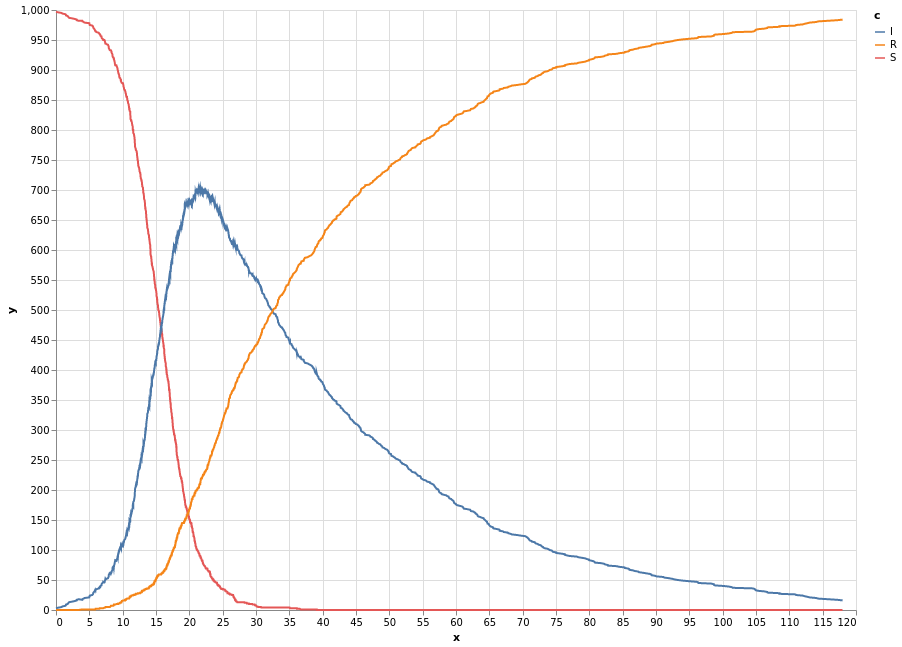

In [16]:
plot(loadCSV("cpp/runner1_out.csv"), "time")

## Experiment: Maxima Distribution

Because the discrete event simulation is probabilistic, we can get different results each time we run it.  This allows us to sample from the simulation multiple times and build experiments about probabilities.

For example, this C++ code implements an experiment that determines the probability of reaching the peak on a particular 'day' in our simulation by running 10000 simulations and keeping which day the state variable `I` reached its peak:

```C++
#include<iostream>
#include<map>
#include"sir.cpp"

// run 10000 simulations and plot the distribution of the 
// time unit at which peak infection was reached 

int main(int argc, char** argv) {
  std::map<int, int> results;

  for(int i = 0; i < 10000; i++) {
    SIR sir;          // intialize the simulator
    sir.set_seed(i);  // use `i` as the seed for PRNG

    int peak = sir.state_I;
    int peak_day = sir.time;

    while(sir.time < 120.0) {
      int event;                 
      double nextEventTime;
      sir.next_event(event, nextEventTime);
      sir.run_event(event, nextEventTime);

      if(sir.state_I > peak) {
        peak = sir.state_I;
        peak_day = sir.time;
      }
    }

    if(results.find(peak_day) == results.end()) {
      results[peak_day] = 0;
    }
    results[peak_day] = results[peak_day] + 1;
  }

  std::cout << "time,peak_probability" << std::endl;
  for(auto const& kv : results) {
    std::cout << kv.first << "," << (kv.second / 10000.0) << std::endl;
  }
}
```

Running this produces a data series we can plot:

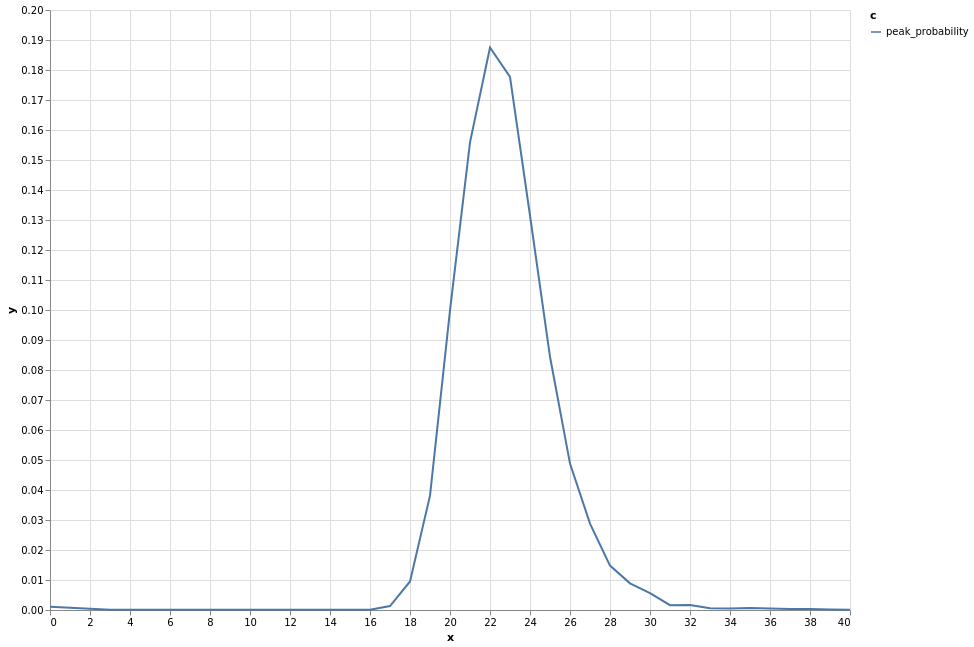

In [17]:
plot(loadCSV("cpp/runner2_out.csv"), "time")

We can also design a experiment along similar lines to measure the exact time the simulation reached `I` its maximum value of `I` - here is some code that could implement this by running the simulation 100 times:

```C++
#include<iostream>
#include<map>
#include"sir.cpp"

// run 10000 simulations and plot the distribution of the 
// time unit at which peak infection was reached 

int main(int argc, char** argv) {
  std::cout << "time,peak" << std::endl;

  for(int i = 0; i < 100; i++) {
    SIR sir;          // intialize the simulator
    sir.set_seed(i);  // use `i` as the seed for PRNG

    double peak = sir.state_I;
    double peak_time = sir.time;

    while(sir.time < 120.0) {
      int event;                 
      double nextEventTime;
      sir.next_event(event, nextEventTime);
      sir.run_event(event, nextEventTime);

      if(sir.state_I > peak) {
        peak = sir.state_I;
        peak_time = sir.time;
      }
    }


    std::cout << peak_time << "," << peak << std::endl;
  }
}
```

We can plot this as a scatterplot (using the `scatter` function) where each data point represents a sample from the model simulation:

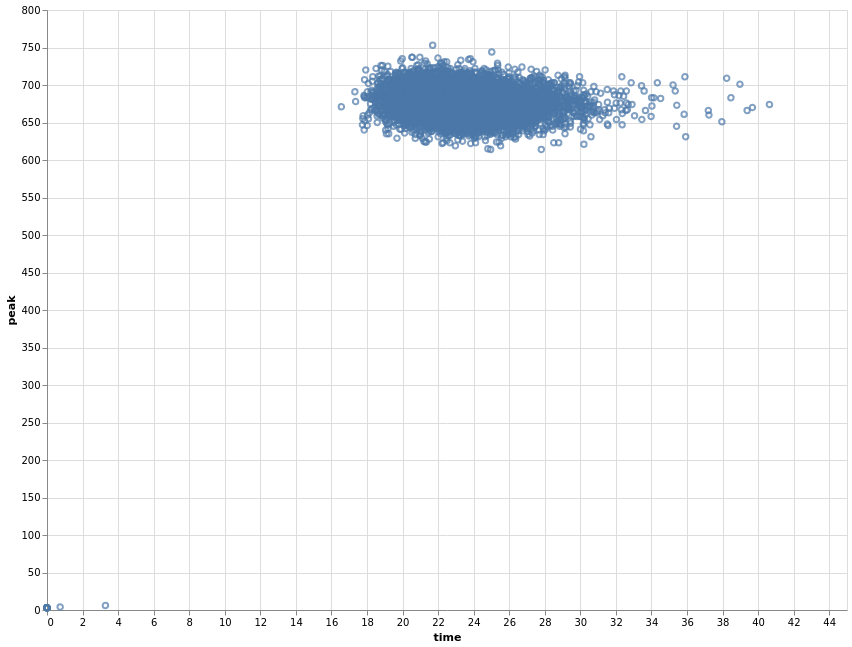

In [18]:
scatter(loadCSV("cpp/runner3_out.csv"),"time", "peak")

# Stratification

Initial support for automating the construction of models that are spatially stratified is accessible using the `stratifySpatial` function.  This uses code provided by GTRI/UFl to take a spatial connection graph `G` and a model `M` to derive a model which expresses several instances of `M` laid out spatially with respect to `G`.

For example, suppose we have this connection graph in the file `cities.txt`:

```
Portland -> Seattle
Seattle -> Portland
```

We can build a new model using `stratifySpatial` derived from this along with our SIR model:

In [19]:
sea_pdx_sir = stratifySpatial(sirESL, "connectionGraph/cities.txt")

In [20]:
sea_pdx_sir

model foo:
  state S_Portland = S_Portland_initial_0
  state I_Portland = I_Portland_initial_1
  state R_Portland = R_Portland_initial_2
  state S_Seattle = S_Seattle_initial_3
  state I_Seattle = I_Seattle_initial_4
  state R_Seattle = R_Seattle_initial_5
  event diff_S_Portland_S_Seattle:
    rate:
      diff_S_Portland_S_Seattle_rate_6
    effect:
      S_Portland = (S_Portland - 1.0)
      S_Seattle = (S_Seattle + 1.0)
  event diff_I_Portland_I_Seattle:
    rate:
      diff_I_Portland_I_Seattle_rate_7
    effect:
      I_Portland = (I_Portland - 1.0)
      I_Seattle = (I_Seattle + 1.0)
  event diff_R_Portland_R_Seattle:
    rate:
      diff_R_Portland_R_Seattle_rate_8
    effect:
      R_Portland = (R_Portland - 1.0)
      R_Seattle = (R_Seattle + 1.0)
  event diff_S_Seattle_S_Portland:
    rate:
      diff_S_Seattle_S_Portland_rate_9
    effect:
      S_Seattle = (S_Seattle - 1.0)
      S_Portland = (S_Portland + 1.0)
  event diff_I_Seattle_I_Portland:
    rate:
      diff_I_Seatt

Note that the above model is incomplete - it is missing bindings for variables like `Infect_Seattle_rate_14`.  For this reason it is output not as a model but as a string that can be saved (using `save`) and edited.  Automation of the addition of default rates for these variables is a work in progress.

After editing the file, we can use `simulateODE` on model normally and plot it:

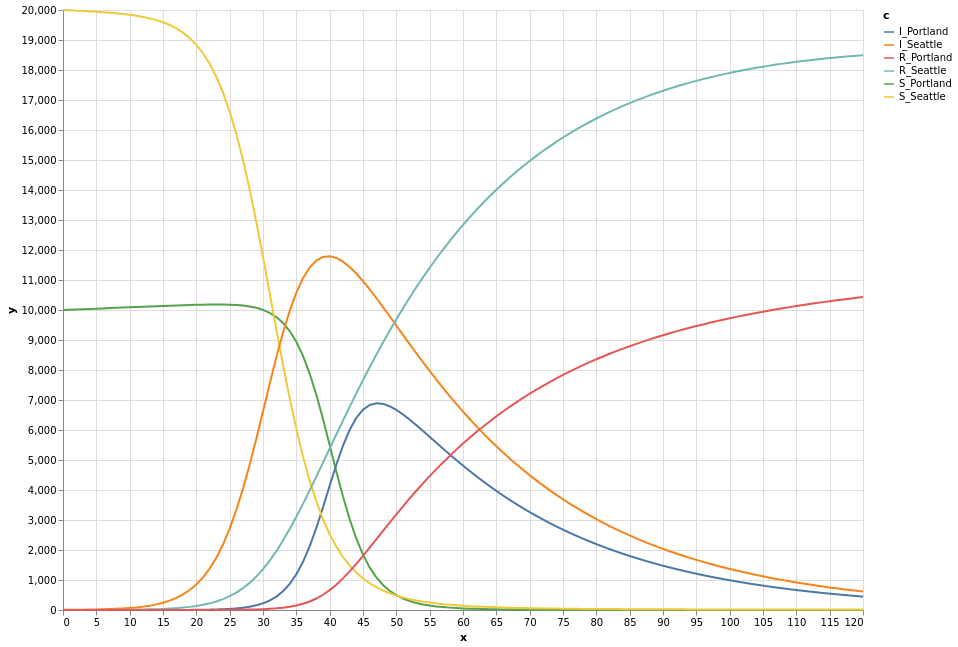

In [22]:
plot(simulateODE(loadESL("stratified_edited.esl"), 0, 120.0, 1.0), "time")